# Imputation des valeurs manquantes avec Prophet

Ce notebook sert d'interface. Le traitement est dans `prophet_fill.py`.

In [1]:
!pip -q install prophet pyarrow

In [7]:
import sys
sys.path.append("/home/onyxia/france-grid-stress-prediction/src")


import pandas as pd
from pathlib import Path

from nettoyage.data.prophet_fill import fill_missing_with_prophet


# Chemins (à adapter)
DATA_DIR = Path('/home/onyxia/france-grid-stress-prediction/data/processed')
IN_PATH = DATA_DIR / 'dataset_model_hourly.parquet'
OUT_PATH = DATA_DIR / 'dataset_model_hourly_prophetfilled.parquet'

df = pd.read_parquet(IN_PATH)
df_raw = df.copy()

df_filled = fill_missing_with_prophet(df, date_col='datetime', value_col='load_mw', freq='H')
df_filled.to_parquet(OUT_PATH, index=False)
OUT_PATH

10:52:53 - cmdstanpy - INFO - Chain [1] start processing
10:54:44 - cmdstanpy - INFO - Chain [1] done processing
/home/onyxia/france-grid-stress-prediction/src/nettoyage/data/prophet_fill.py:87: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ds_full = pd.date_range(out[date_col].min(), out[date_col].max(), freq=freq)


PosixPath('/home/onyxia/france-grid-stress-prediction/data/processed/dataset_model_hourly_prophetfilled.parquet')

In [8]:
# Contrôle rapide
print('NaN avant :', df['load_mw'].isna().sum())
print('NaN après :', df_filled['load_mw'].isna().sum())
df_filled[['datetime','load_mw','filled_by_prophet']].tail()

NaN avant : 5160
NaN après : 0


,datetime,load_mw,filled_by_prophet
131491,2024-12-31 19:00:00,63247.5,False
131492,2024-12-31 20:00:00,65079.0,False
131493,2024-12-31 21:00:00,63177.5,False
131494,2024-12-31 22:00:00,60575.0,False
131495,2024-12-31 23:00:00,58688.5,False


In [14]:
mask_filled = df_raw["load_mw"].isna()
mask_filled = mask_filled.reindex(df_filled.index)


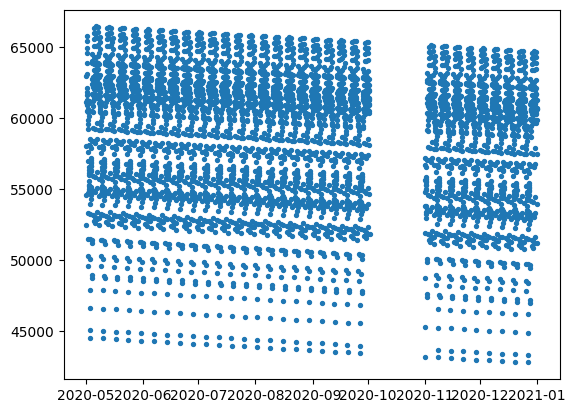

In [15]:
plt.scatter(
    df_filled.loc[mask_filled, "datetime"],
    df_filled.loc[mask_filled, "load_mw"],
    s=8,
    label="Valeurs imputées"
)


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# s'assurer que datetime est bien en datetime
df_raw["datetime"] = pd.to_datetime(df_raw["datetime"])
df_filled["datetime"] = pd.to_datetime(df_filled["datetime"])

# filtre 2020
mask_2020 = (df_raw["datetime"] >= "2020-01-01") & (df_raw["datetime"] < "2021-01-01")

raw_2020 = df_raw.loc[mask_2020].copy()
filled_2020 = df_filled.loc[mask_2020].copy()


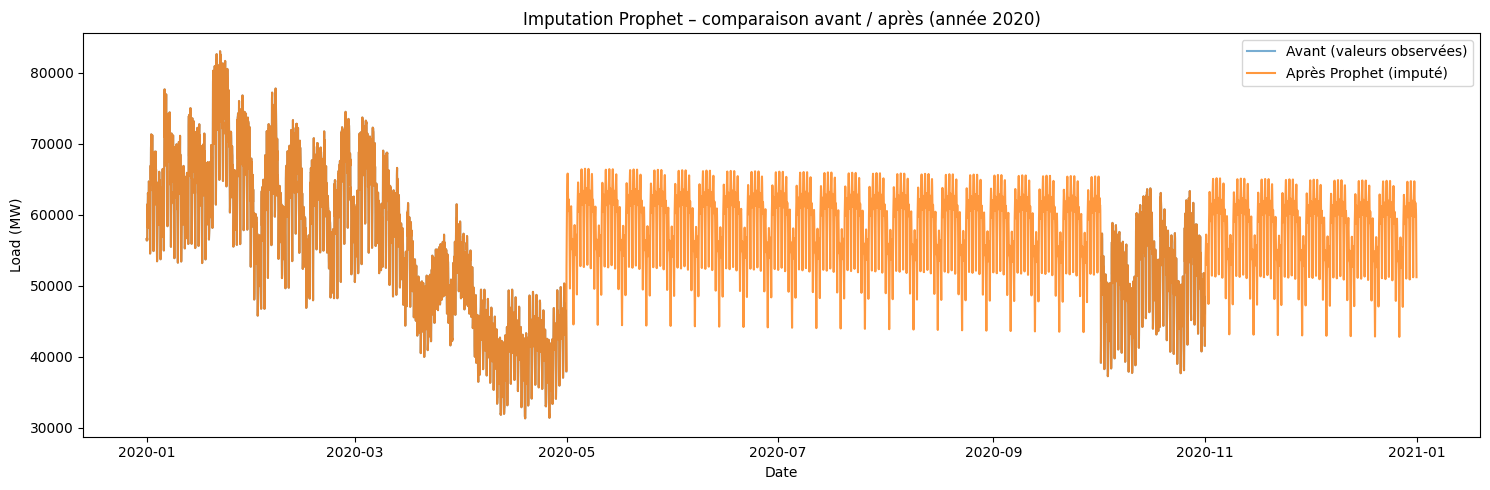

In [10]:
plt.figure(figsize=(15, 5))

# avant (avec trous)
plt.plot(
    raw_2020["datetime"],
    raw_2020["load_mw"],
    label="Avant (valeurs observées)",
    alpha=0.6
)

# après Prophet
plt.plot(
    filled_2020["datetime"],
    filled_2020["load_mw"],
    label="Après Prophet (imputé)",
    alpha=0.8
)

plt.title("Imputation Prophet – comparaison avant / après (année 2020)")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()


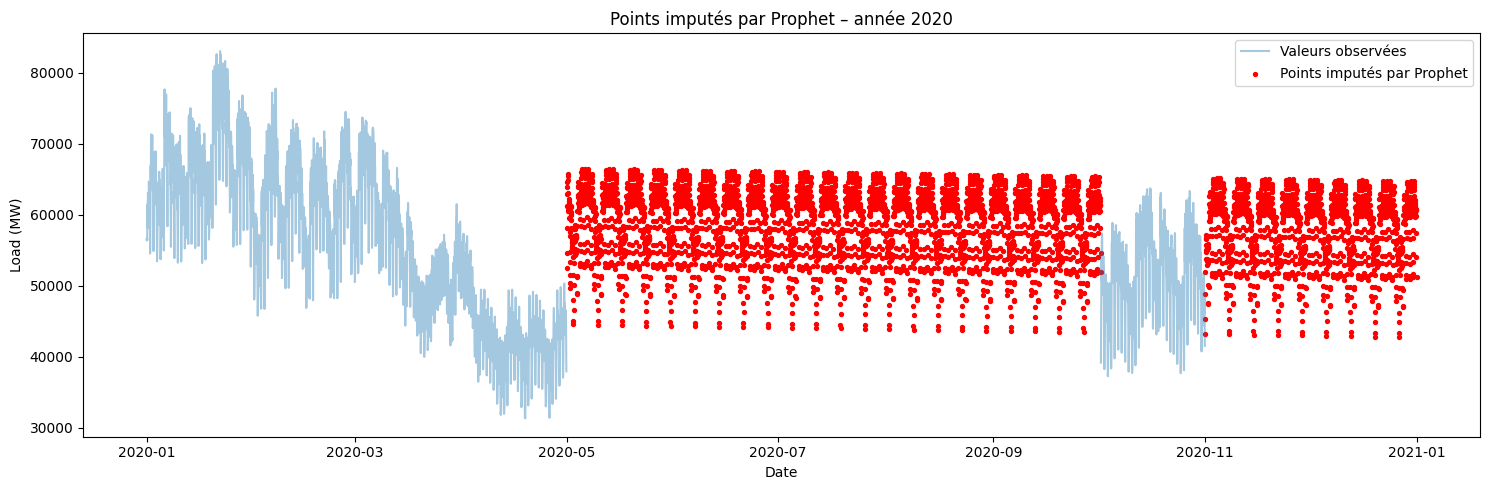

In [11]:
filled_only = filled_2020[filled_2020["filled_by_prophet"]]

plt.figure(figsize=(15, 5))

plt.plot(
    raw_2020["datetime"],
    raw_2020["load_mw"],
    label="Valeurs observées",
    alpha=0.4
)

plt.scatter(
    filled_only["datetime"],
    filled_only["load_mw"],
    color="red",
    s=8,
    label="Points imputés par Prophet"
)

plt.title("Points imputés par Prophet – année 2020")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()


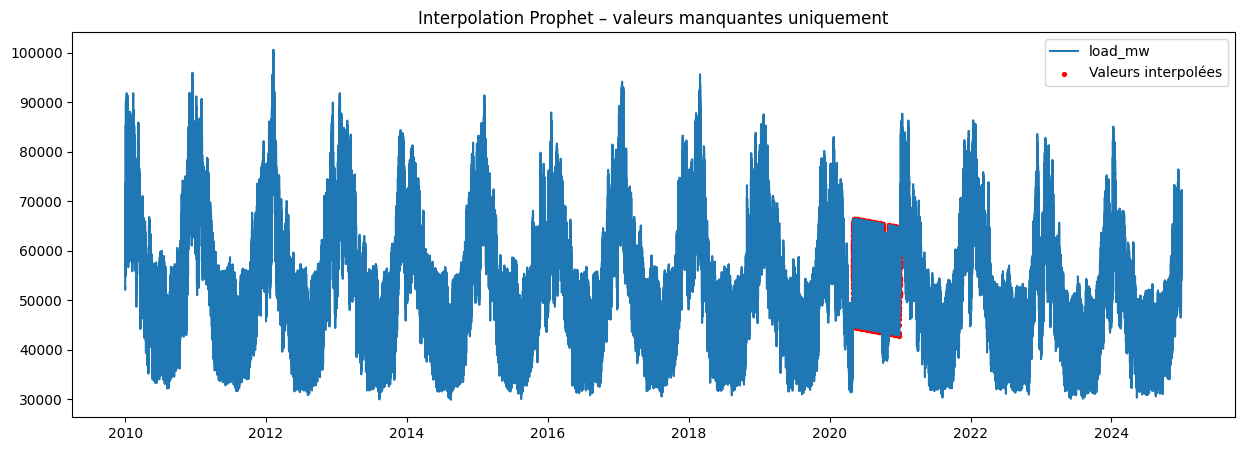

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df_filled['datetime'], df_filled['load_mw'], label='load_mw')
plt.scatter(
    df.loc[df['load_mw'].isna(), 'datetime'],
    df_filled.loc[df['load_mw'].isna(), 'load_mw'],
    color='red',
    s=8,
    label='Valeurs interpolées'
)
plt.legend()
plt.title("Interpolation Prophet – valeurs manquantes uniquement")
plt.show()


In [13]:
filled_by_prophet == True


NameError: name 'filled_by_prophet' is not defined